### Imports

In [1]:
from selenium import webdriver           
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait#import webDriver
from bs4 import BeautifulSoup
sys.path.insert(0,'E:/Manoj/downloads')

ModuleNotFoundError: No module named 'selenium'

In [62]:
import pandas as pd
import numpy as np
import sys
import re
import matplotlib.pyplot as plt
import time

### Search for see all reviews button and click to load the reviews

In [49]:

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')                             
chrome_options.add_argument('--disable-dev-shm-usage')
selenium = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
selenium.get("https://play.google.com/store/apps/details?id=com.practo.fabric&utm_source=appgrooves&utm_medium=agp_81acc8a18b054eadad002f4c3e318133_com.practo.fabric_us_others_16676570314812")

##wait for the dom to load element and the target button/span is clickable
WebDriverWait(selenium,120).until(expected_conditions.element_to_be_clickable((By.XPATH,'.//span[contains(., "See all reviews") and @class="VfPpkd-vQzf8d"]'))).click()

#wait.until(expected_conditions.element_to_be_clickable((By.CSS_SELECTOR, '.VfPpkd-LgbsSe button'))).click()
#python_button = selenium.find_elements(By.CLASS_NAME,"VfPpkd-LgbsSe")[0]
#print(python_button)
#python_button.click()
#url = "https://www.amazon.in/"            #url 
#wd.get(url)        

C:\Users\info\AppData\Local\Temp\ipykernel_8940\1866220883.py:4: DeprecationWarning: use options instead of chrome_options
  selenium = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


### Scroll until the last review

In [70]:
reviews=[]
ratings=[]

### Once scroll is complete, find all the review divs and get the review comments plus the label (rating)

In [72]:
def get_reviews():
    html = selenium.page_source

    soup = BeautifulSoup(selenium.page_source,"html.parser")
    for review in soup.find_all(class_="RHo1pe"):
        ratings.append(review.find("div",class_="iXRFPc").attrs['aria-label'])
        reviews.append(review.find("div",class_="h3YV2d").text)

In [69]:
last_elem=""
while True:
    current_last_elem="div.RHo1pe:last-child"
    scroll = "document.querySelector(\'"+current_last_elem+"\').scrollIntoView();"
    selenium.execute_script(scroll)
    time.sleep(1)
    current_last_elem=selenium.find_elements(By.CLASS_NAME,"RHo1pe")[-1]
    if(last_elem==current_last_elem):
        break
    else:
        last_element = current_last_elem



KeyboardInterrupt



In [73]:
get_reviews()

In [74]:
df = pd.DataFrame({"Review":reviews,"ratings":ratings})

In [75]:
df.shape

(7160, 2)

In [77]:
df.to_csv("practo_app_reviews_raw_data.csv")

### Extract the rating number from raw label

In [44]:
data = pd.read_csv('practo_app_reviews_raw_data.csv')

In [45]:
data.head()

,Unnamed: 0,Review,ratings
0,0,Difficult to navigate but somewhat useful app....,Rated 1 stars out of five stars
1,1,I find the medical records section frustrating...,Rated 2 stars out of five stars
2,2,Really buggy software. And has this even been ...,Rated 1 stars out of five stars
3,3,The app keeps getting unresponsive. During con...,Rated 1 stars out of five stars
4,4,Everything is good but connecting to a differe...,Rated 3 stars out of five stars


In [46]:
data["ratings"]

0       Rated 1 stars out of five stars
1       Rated 2 stars out of five stars
2       Rated 1 stars out of five stars
3       Rated 1 stars out of five stars
4       Rated 3 stars out of five stars
                     ...               
7155    Rated 1 stars out of five stars
7156    Rated 5 stars out of five stars
7157    Rated 5 stars out of five stars
7158    Rated 5 stars out of five stars
7159    Rated 1 stars out of five stars
Name: ratings, Length: 7160, dtype: object

In [47]:
data["ratings"]=[rating[6] for rating in data["ratings"]]

In [48]:
data = data[["Review","ratings"]]

In [49]:
data.head()

,Review,ratings
0,Difficult to navigate but somewhat useful app....,1
1,I find the medical records section frustrating...,2
2,Really buggy software. And has this even been ...,1
3,The app keeps getting unresponsive. During con...,1
4,Everything is good but connecting to a differe...,3


(array([3873.,    0.,  386.,    0.,    0.,  313.,    0.,  464.,    0.,
        2124.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

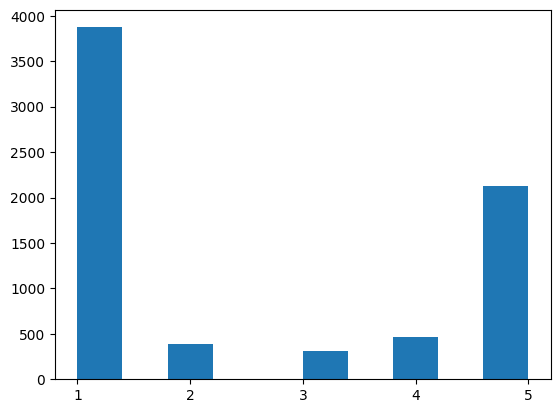

In [50]:
plt.hist(data["ratings"])

> there is not much data scraped for reviews 2,3 & 4

In [51]:
data[data["ratings"]=="1"].iloc[0].Review

"Difficult to navigate but somewhat useful app. With rapid changes to the app's UI it becomes really difficult to navigate through the various features. I don't see my appointments under the 'Appointments' menu, but rather they show up under 'Consultation' from where I cannot reschedule. It has also become confusing to search for a doctor. Update: video calling no longer works. Doctor tried calling but I did not get any notification even when app was open. Same problem with my friends."

In [52]:
data[data["ratings"]=="5"].iloc[0].Review

"Nice app easy to use authentic and reliable. doctors are available 24*7 and also good. they listen their patient very calmly and their prescribed treatment goes very well. must use this app. if you live in rural areas or hotspitals are far from your place or your want to avoid unnecessary queue or you want treatment asap this app is for you. I used this app many times for different age person's treatment, all the times doctor's were well versed and proficient. kindly go through this app."

#### sklearn,tensorflow and model imports

In [57]:
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [54]:
lbl_enc = preprocessing.LabelEncoder()
data["ratings"] = lbl_enc.fit_transform(data["ratings"])

In [55]:
train_X,test_X,train_y,test_y=train_test_split(data["Review"],data["ratings"],test_size=0.25)

In [59]:
test_X

5208    Don't book appointments from here, you have to...
1876    Worst experience. Consultation: when ever I re...
4094    I was unable to pay fully for my video consult...
151     Bad service, and certainly looting money. Doc ...
6381    Treatment is good satisfied iam diagnosed as a...
                              ...                        
4957    Practo has made life very convenient by bringi...
3076    The Doctors are available for in clinic consul...
6765    Absolutely rubbish.. this app sucks man..try g...
6375    Easy to use and find best verified doctors ove...
406     I am giving it 4 stars. Overall experience was...
Name: Review, Length: 1790, dtype: object

 ### TFID - represention of words on term frequency and with the whole data

In [56]:
tfv = TfidfVectorizer(stop_words="english")
tfv.fit(list(train_X)+list(test_X))
train_X_tfv = tfv.transform(train_X)
test_X_tfv = tfv.transform(test_X)

In [73]:
model =LogisticRegression()
model.fit(train_X_tfv,train_y)
pred = model.predict_proba(test_X_tfv)

In [74]:
y_pred = [np.argmax(y) for y in pred]

In [75]:
y_pred[0]

0

In [77]:
test_X[6381],test_y[6381]

('Treatment is good satisfied iam diagnosed as a cervical disc bulg radiant pain and swelling on left hand ,I took medicines also but no use, but I thank to Dr Ananda Jothi now iam very much good thanks to Sri sugam physiotherapy clinic.',
 4)

In [79]:
np.argmax(model.predict_proba(tfv.transform([test_X[6381]])))

4

#### below sentiments are not great
> as TFID is just about considering the occurrance of a token within the sent

In [84]:
np.argmax(model.predict_proba(tfv.transform(["not bad"])))

0

In [90]:
np.argmax(model.predict_proba(tfv.transform(["app did not crash anytime"])))

0

In [89]:
np.argmax(model.predict_proba(tfv.transform(["No issues with the app"])))

0